# Using Visualization for Exploratory Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
space_data = pd.read_csv(file_path)
space_data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Text(31.08777291666665, 0.5, 'Pay load Mass (kg)')

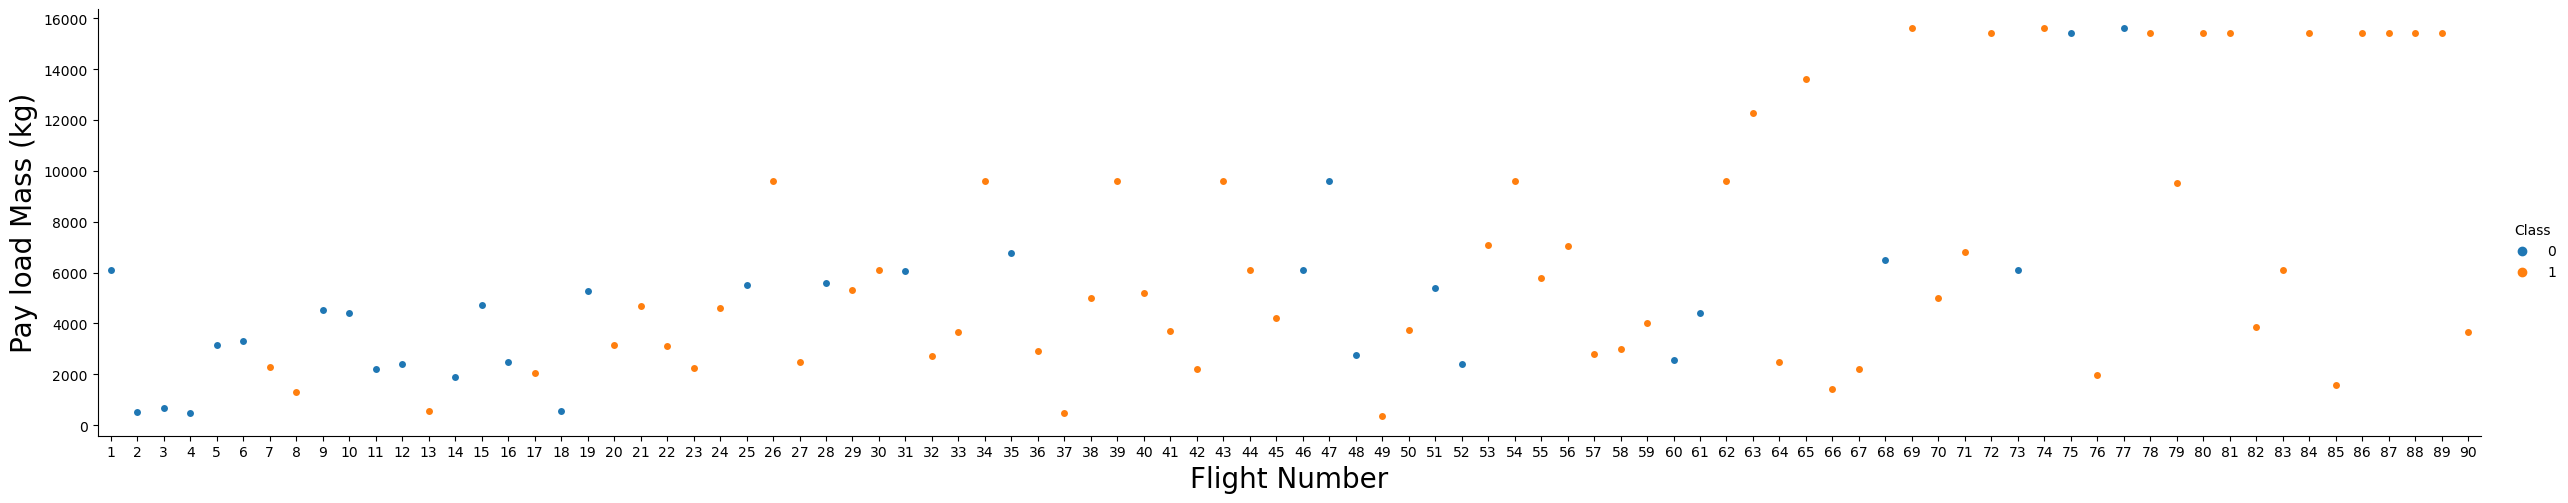

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", 
            data=space_data, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)

### TASK 1: 
* Visualize the relationship between *Flight Number* and *Launch Site*

In [18]:
space_data['LaunchSite'].unique()

array(['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

Text(45.78264583333335, 0.5, 'Launch Site')

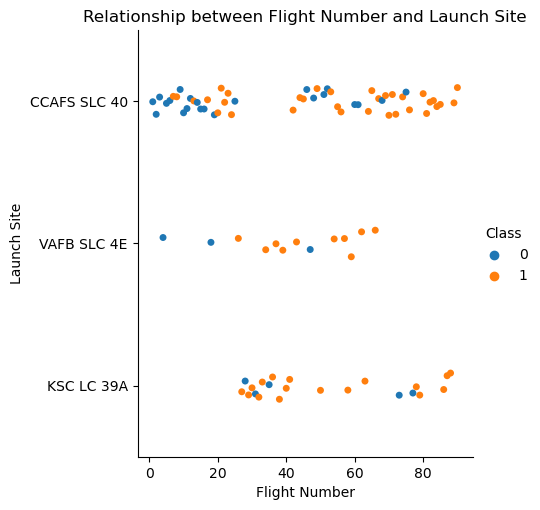

In [4]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=space_data)
plt.title('Relationship between Flight Number and Launch Site')
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")

The `VAFB SLC 4E` and `KSC LC 39A` sites seem to have  better success overall. However, most of the launches have been from the `CCAFS SLC 40` site, more recent launches there seem to have more successes than previously. 

### TASK 2: 
* Visualize the relationship between *Payload* and *Launch Site*

Text(45.78264583333335, 0.5, 'Launch Site')

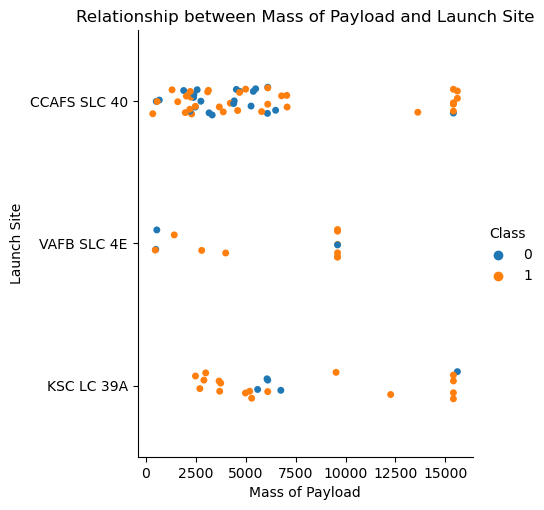

In [5]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=space_data)
plt.title('Relationship between Mass of Payload and Launch Site')
plt.xlabel("Mass of Payload")
plt.ylabel("Launch Site")

### TASK  3: 
* Visualize the relationship between success rate of each orbit type

In [6]:
orbit_data = space_data.groupby('Orbit')['Class'].mean()
orbit_data = orbit_data.reset_index()
orbit_data.sort_values('Class', ascending=False, inplace=True)
orbit_data

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
3,HEO,1.000000
9,SSO,1.000000
10,VLEO,0.857143
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
4,ISS,0.619048
2,GTO,0.518519


Text(0, 0.5, 'Success Rate')

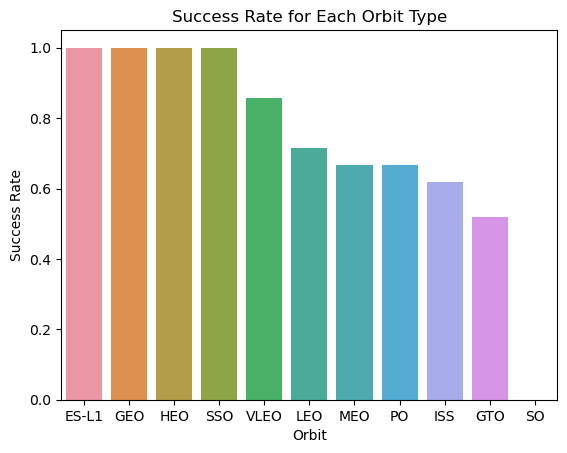

In [7]:
sns.barplot(data=orbit_data, 
            x='Orbit', 
            y='Class')
plt.title('Success Rate for Each Orbit Type')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')

Orbits ES-L1, GEO, HEO, and SSO all have 100% success rates. 

### TASK  4: 
* Visualize the relationship between *FlightNumber* and *Orbit* type

Text(38.80595833333332, 0.5, 'Orbit')

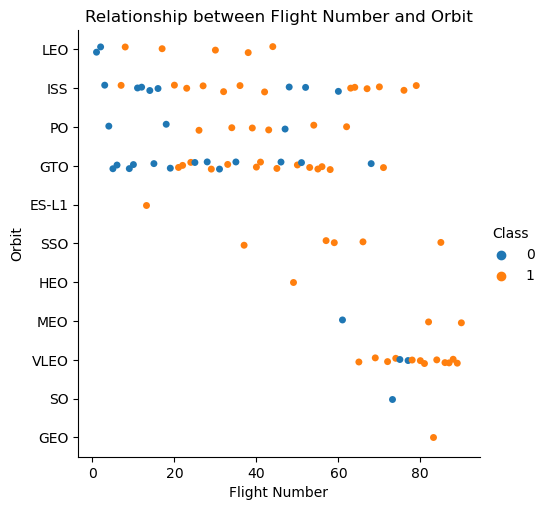

In [8]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=space_data)
plt.title('Relationship between Flight Number and Orbit')
plt.xlabel("Flight Number")
plt.ylabel("Orbit")

For the LEO orbit, the number of successes appear increase as the number of flights increase. On the other hand, there seems to be no relationship between flight number and successes for the GTO orbit.

### TASK  5: 
* Visualize the relationship between Payload and Orbit type

Text(38.80595833333332, 0.5, 'Orbit')

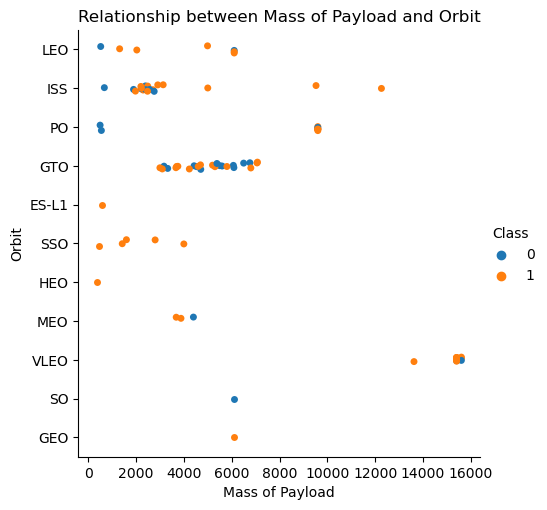

In [9]:
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=space_data)
plt.title('Relationship between Mass of Payload and Orbit')
plt.xlabel("Mass of Payload")
plt.ylabel("Orbit")

With heavy payloads the Polar, LEO and ISS orbits seem to be more successful.

However, for GTO there doesn't seem to be any relationship between the success rate and the mass of the payload.

### TASK  6: 
* Visualize the launch success yearly trend

In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year(df):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year(space_data)
space_data['Year'] = year
space_data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


In [19]:
year_data = space_data.groupby('Year')['Class'].count()
year_data = year_data.reset_index()
year_data

,Year,Class
0,2010,1
1,2012,1
2,2013,3
3,2014,6
4,2015,6
5,2016,8
6,2017,18
7,2018,18
8,2019,10
9,2020,19


In [11]:
year_data = space_data.groupby('Year')['Class'].mean()
year_data = year_data.reset_index()
year_data

,Year,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


Text(0, 0.5, 'Success Rate')

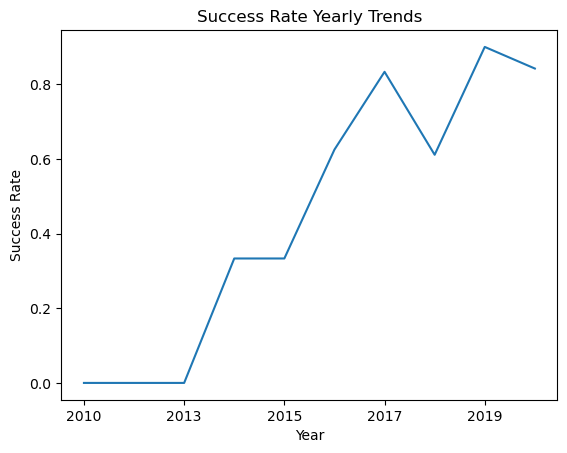

In [12]:
year_data.plot(x='Year', y='Class', legend=None)
plt.title('Success Rate Yearly Trends')
plt.xlabel('Year')
plt.ylabel('Success Rate')

### Feature Engineering

In [13]:
features = space_data[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', \
               'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', \
               'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: 
* Create dummy variables to categorical columns:
    * Orbit
    * LaunchSite
    * LandingPad
    * Serial

In [14]:
# Convert categorical to binary variables
features_one_hot = pd.get_dummies(data=features, 
                                  columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15400.000000,6,True,True,True,5.0,5,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15400.000000,3,True,True,True,5.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


### TASK  8: 
* Cast all columns to `float64`

In [15]:
# Format as floating point values
features_one_hot = features_one_hot.astype(float)
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)